In [1]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
plt.style.use('seaborn')

#model developemnt libraries
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2

from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
df = pd.read_csv('Red-wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df.shape

(1599, 12)

In [7]:
#data preprocessing

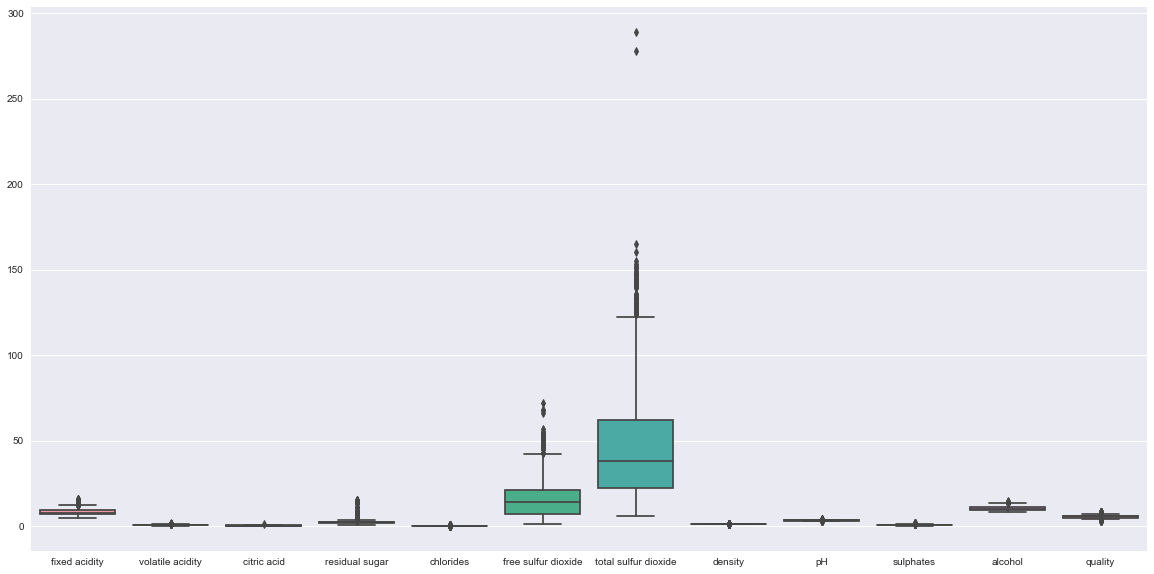

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
sns.boxplot(data = df)

In [16]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X = df.drop('quality', axis = 1)
y = df['quality']

In [17]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 100)

In [12]:
#grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [13]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [18]:
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [19]:
#summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.601651 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.600402 (0.034232) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.584138 (0.030956) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.589142 (0.027444) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.601651 (0.032084) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.584553 (0.030076) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.586851 (0.027588) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.595183 (0.026523) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.583302 (0.029147) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.578513 (0.030226) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.586212 (0.022312) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.579129 (0.027386) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.570173 (0.027208) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.567040 (0.028581) with

In [20]:
from sklearn.linear_model import RidgeClassifier

In [21]:
# define models and parameters
model_1 = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [22]:
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_1, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [23]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.584137 using {'alpha': 0.4}
0.583928 (0.029337) with: {'alpha': 0.1}
0.584137 (0.028982) with: {'alpha': 0.2}
0.584137 (0.029295) with: {'alpha': 0.3}
0.584137 (0.029295) with: {'alpha': 0.4}
0.583720 (0.029421) with: {'alpha': 0.5}
0.583303 (0.029276) with: {'alpha': 0.6}
0.583512 (0.028744) with: {'alpha': 0.7}
0.583512 (0.028744) with: {'alpha': 0.8}
0.583095 (0.029134) with: {'alpha': 0.9}
0.583095 (0.029134) with: {'alpha': 1.0}


In [24]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
# define models and parameters
model_5 = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2', 'max_depth']

In [29]:
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_5, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [30]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.709625 using {'max_features': 'log2', 'n_estimators': 1000}
0.684396 (0.035342) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.709404 (0.026084) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.709623 (0.024690) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.672708 (0.029550) with: {'max_features': 'log2', 'n_estimators': 10}
0.706292 (0.029134) with: {'max_features': 'log2', 'n_estimators': 100}
0.709625 (0.026296) with: {'max_features': 'log2', 'n_estimators': 1000}
0.000000 (0.000000) with: {'max_features': 'max_depth', 'n_estimators': 10}
0.000000 (0.000000) with: {'max_features': 'max_depth', 'n_estimators': 100}
0.000000 (0.000000) with: {'max_features': 'max_depth', 'n_estimators': 1000}
